In [1]:
####What explains variation in the price of skincare products? 
###Dataset collected/cleaned by Erin Ward: https://www.kaggle.com/eward96/skincare-products-clean-dataset


#load libraries and dataset
import pandas as pd
import numpy as np
from numpy import asarray
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
from pdpbox import pdp, info_plots
import category_encoders as ce
import scipy.stats as stats
import researchpy as rp

df = pd.read_csv('skincare_products_clean.csv')

In [2]:
df['row_num'] = np.arange(len(df))

In [3]:
df.isnull().sum()

product_name     0
product_url      0
product_type     0
clean_ingreds    0
price            0
row_num          0
dtype: int64

In [4]:
df

,product_name,product_url,product_type,clean_ingreds,price,row_num
0,The Ordinary Natural Moisturising Factors + HA...,https://www.lookfantastic.com/the-ordinary-nat...,Moisturiser,"['capric triglyceride', 'cetyl alcohol', 'prop...",£5.20,0
1,CeraVe Facial Moisturising Lotion SPF 25 52ml,https://www.lookfantastic.com/cerave-facial-mo...,Moisturiser,"['homosalate', 'glycerin', 'octocrylene', 'eth...",£13.00,1
2,The Ordinary Hyaluronic Acid 2% + B5 Hydration...,https://www.lookfantastic.com/the-ordinary-hya...,Moisturiser,"['sodium hyaluronate', 'sodium hyaluronate', '...",£6.20,2
3,AMELIORATE Transforming Body Lotion 200ml,https://www.lookfantastic.com/ameliorate-trans...,Moisturiser,"['ammonium lactate', 'c12-15', 'glycerin', 'pr...",£22.50,3
4,CeraVe Moisturising Cream 454g,https://www.lookfantastic.com/cerave-moisturis...,Moisturiser,"['glycerin', 'cetearyl alcohol', 'capric trigl...",£16.00,4
...,...,...,...,...,...,...
1133,Elemis Life Elixirs Embrace Bath and Shower El...,https://www.lookfantastic.com/elemis-life-elix...,Bath Oil,"['prunus amygdalus dulcis', 'tipa-laureth sulf...",£55.00,1133
1134,Love Boo Splendidly Soothing Bath Soak (250ml),https://www.lookfantastic.com/love-boo-splendi...,Bath Oil,"['sodium lauroyl', 'sodium cocoamphoacetate', ...",£10.99,1134
1135,Elemis Life Elixirs Fortitude Bath and Shower ...,https://www.lookfantastic.com/elemis-life-elix...,Bath Oil,"['prunus amygdalus dulcis', 'tipa-laureth sulf...",£55.00,1135
1136,Connock London Kukui Oil Soothing Bath & Showe...,https://www.lookfantastic.com/connock-london-k...,Bath Oil,"['capric triglyceride', 'peg-40 sorbitan perol...",£36.00,1136


In [5]:
#strip characters from the price column and run descriptives of the dataset
df['price'] = df['price'].str.replace('£', '').astype(float) 

df.describe(include='all')

,product_name,product_url,product_type,clean_ingreds,price,row_num
count,1138,1138,1138,1138,1138.000000,1138.000000
unique,1138,1126,14,1071,NaN,NaN
top,Darphin Intral Redness Relief Recovery Balm,https://www.lookfantastic.com/lancome-advanced...,Mask,['magnesium sulfate'],NaN,NaN
freq,1,4,124,5,NaN,NaN
mean,NaN,NaN,NaN,NaN,24.021775,568.500000
std,NaN,NaN,NaN,NaN,21.770652,328.656609
min,NaN,NaN,NaN,NaN,1.950000,0.000000
25%,NaN,NaN,NaN,NaN,9.950000,284.250000
50%,NaN,NaN,NaN,NaN,18.925000,568.500000
75%,NaN,NaN,NaN,NaN,31.500000,852.750000


There are 1138 unique products in this dataset that fall into one of 14 catgories. There are 1071 unique ingredient lists, indicating that some products may have the same ingredient list. There are 290 unique price points, and the average cost of a product is about £24.00. The standard deviation of the price is about £22, and the median is about £19, indicating that the products are somewhat pricey and that the dataset contains somewhat wide variation in the price of products. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7faffd6b7c40>]],
      dtype=object)

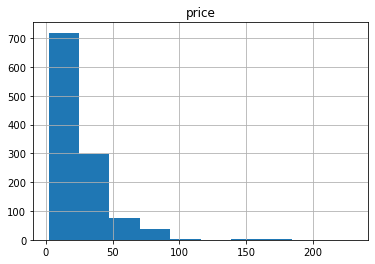

In [6]:
#graph price
df.hist('price')

Overall, the price of products are mostly less than £50, with some outliers around £100 and over £150. 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

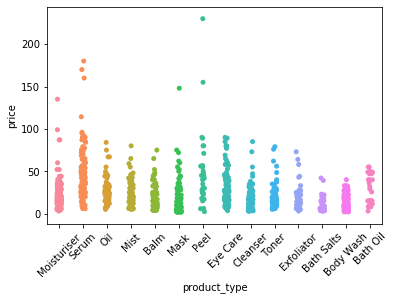

In [7]:
type_price = sns.stripplot(x="product_type", y="price", data=df)
plt.xticks(rotation=45)

Overall, the price of products is fairly stable between types of products, as most products are under £100. However, one moisturizer, a few serums, a mask, and two peels are over £100. These observations may be outliers that skew interprertations of the importance of product type for variation in price. It is possible that specific product types inform the price of a product.

In [8]:
#chi-squared tests to determine if product type/ingredients are related to product price
crosstab1, chi2_results1, expected = rp.crosstab(df["product_type"], df["price"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

chi2_results1

,Chi-square test,results
0,Pearson Chi-square ( 3757.0) =,5194.8620
1,p-value =,0.0000
2,Cramer's V =,0.5926


A chi-squared test indicates there is a statistically significant relationship between product type and price. This suggests that this feature may be important in the model.

In [9]:
crosstab2, chi2_results2, expected = rp.crosstab(df["clean_ingreds"], df["price"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")
chi2_results2

,Chi-square test,results
0,Pearson Chi-square ( 309230.0) =,308367.0720
1,p-value =,0.8638
2,Cramer's V =,0.9683


There are 1071 unique ingredient lists, and it would not be informative to plot 1071 unique ingredient lists against price because the lists do not repeat. A chi-squared test does not detect a statistically significant relationship between unique ingredient lists and product price.

One possibility is that the first ingredient of a product, because it is most abundant, determines the price of a product, rather than the combination of ingredients in ingredient lists. To explore this, we need to break the column with the lists of ingredients into separate columns indicating the presence or absensce of an ingredient. 

In [10]:
#first, we need to encode product types into separate coluns
product_types = pd.get_dummies(df['product_type'])

In [11]:
product_types['row_num'] = np.arange(len(product_types))

In [12]:
product_types

,Balm,Bath Oil,Bath Salts,Body Wash,Cleanser,Exfoliator,Eye Care,Mask,Mist,Moisturiser,Oil,Peel,Serum,Toner,row_num
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,3
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1133,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1133
1134,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1134
1135,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1135
1136,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1136


In [13]:
#clean_ingreds is a column full of lists. We need to split the items in the lists into 
#binary columns.

df['clean_ingreds'] = df['clean_ingreds'].str.replace('[', '')
df['clean_ingreds'] = df['clean_ingreds'].str.replace(']', '')
df['clean_ingreds'] = df['clean_ingreds'].str.replace("'", '')

In [14]:
ingredients_split = pd.DataFrame(df['clean_ingreds'].str.split(",", expand=True).add_prefix('ingred_'))

In [15]:
ingredients_split['row_num'] = np.arange(len(ingredients_split))

In [16]:
ingredients_split

,ingred_0,ingred_1,ingred_2,ingred_3,ingred_4,ingred_5,ingred_6,ingred_7,ingred_8,ingred_9,...,ingred_81,ingred_82,ingred_83,ingred_84,ingred_85,ingred_86,ingred_87,ingred_88,ingred_89,row_num
0,capric triglyceride,cetyl alcohol,propanediol,stearyl alcohol,glycerin,sodium hyaluronate,arganine,aspartic acid,glycine,alanine,...,None,None,None,None,None,None,None,None,None,0
1,homosalate,glycerin,octocrylene,ethylhexyl,salicylate,niacinamide,silica,butyl methoxydibenzoylmethane,dimethicon,cetearyl alcohol,...,None,None,None,None,None,None,None,None,None,1
2,sodium hyaluronate,sodium hyaluronate,panthenol,ahnfeltia concinna extract,glycerin,pentylene glycol,propanediol,polyacrylate crosspolymer-6,ppg-26 buteth-26,castor oil,...,None,None,None,None,None,None,None,None,None,2
3,ammonium lactate,c12-15,glycerin,prunus amygdalus dulcis,ethylhexyl palmitate,cetearyl alcohol,glyceryl stearate,peg-100 stearate,dimethicon,hydroxyethyl cellulose,...,None,None,None,None,None,None,None,None,None,3
4,glycerin,cetearyl alcohol,capric triglyceride,behentrimonium methosulfate,cetearyl alcohol,cetyl alcohol,ceramide 3,ceramide 6 ii,ceramide 1,sodium hyaluronate,...,None,None,None,None,None,None,None,None,None,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1133,prunus amygdalus dulcis,tipa-laureth sulfate,laureth-2,parfum,propylene glycol,boswellia carterii oil,sorbitan oleate,vetiveria zizanoides root oil,linalool,papaver orientale (poppy) seed oil,...,None,None,None,None,None,None,None,None,None,1133
1134,sodium lauroyl,sodium cocoamphoacetate,cocamidopropyl betaine,lauryl glucoside,stearyl citrate,glycerin,xanthan gum,pelargonium graveolens extract,arnica montana extract,anthemis nobilis flower water,...,None,None,None,None,None,None,None,None,None,1134
1135,prunus amygdalus dulcis,tipa-laureth sulfate,laureth-2,parfum,propylene glycol,pelargonium graveolens extract,sorbitan oleate,linalool,geraniol,cananga odorata flower oil,...,None,None,None,None,None,None,None,None,None,1135
1136,capric triglyceride,peg-40 sorbitan peroleate,ppg-15 stearyl ether,parfum,aleurites moluccanus seed oil,macadamia ternifolia seed oil,calophyllum tacamahaca (tamanu) seed oil,benzyl benzoate,butylphenyl methylpropional,linalool,...,None,None,None,None,None,None,None,None,None,1136


In [17]:
ore = ce.OrdinalEncoder()
ingredients_split = ore.fit_transform(ingredients_split)

In [18]:
ingreds_list = ore.category_mapping

In [19]:
ingredients_split = ingredients_split.replace([-1.0],0)

In [20]:
ingredients_split

,ingred_0,ingred_1,ingred_2,ingred_3,ingred_4,ingred_5,ingred_6,ingred_7,ingred_8,ingred_9,...,ingred_81,ingred_82,ingred_83,ingred_84,ingred_85,ingred_86,ingred_87,ingred_88,ingred_89,row_num
0,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,3,3.0,3.0,3.0,1.0,3.0,3.0,3.0,3.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,4,4.0,4.0,4.0,3.0,4.0,4.0,4.0,2.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4,5,5.0,5.0,5.0,4.0,5.0,5.0,5.0,4.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1133,52,306.0,339.0,147.0,29.0,449.0,449.0,438.0,148.0,460.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1133
1134,160,237.0,70.0,365.0,429.0,36.0,120.0,398.0,446.0,161.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1134
1135,52,306.0,339.0,147.0,29.0,168.0,449.0,94.0,104.0,118.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1135
1136,1,307.0,340.0,147.0,430.0,220.0,450.0,395.0,160.0,159.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1136


In [21]:
product_types

,Balm,Bath Oil,Bath Salts,Body Wash,Cleanser,Exfoliator,Eye Care,Mask,Mist,Moisturiser,Oil,Peel,Serum,Toner,row_num
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,3
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1133,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1133
1134,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1134
1135,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1135
1136,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1136


In [22]:
merged = pd.merge(ingredients_split, product_types, on = "row_num")

In [23]:
merged = pd.merge(df, merged, on = "row_num")

In [24]:
merged

,product_name,product_url,product_type,clean_ingreds,price,row_num,ingred_0,ingred_1,ingred_2,ingred_3,...,Cleanser,Exfoliator,Eye Care,Mask,Mist,Moisturiser,Oil,Peel,Serum,Toner
0,The Ordinary Natural Moisturising Factors + HA...,https://www.lookfantastic.com/the-ordinary-nat...,Moisturiser,"capric triglyceride, cetyl alcohol, propanedio...",5.20,0,1,1.0,1.0,1.0,...,0,0,0,0,0,1,0,0,0,0
1,CeraVe Facial Moisturising Lotion SPF 25 52ml,https://www.lookfantastic.com/cerave-facial-mo...,Moisturiser,"homosalate, glycerin, octocrylene, ethylhexyl,...",13.00,1,2,2.0,2.0,2.0,...,0,0,0,0,0,1,0,0,0,0
2,The Ordinary Hyaluronic Acid 2% + B5 Hydration...,https://www.lookfantastic.com/the-ordinary-hya...,Moisturiser,"sodium hyaluronate, sodium hyaluronate, panthe...",6.20,2,3,3.0,3.0,3.0,...,0,0,0,0,0,1,0,0,0,0
3,AMELIORATE Transforming Body Lotion 200ml,https://www.lookfantastic.com/ameliorate-trans...,Moisturiser,"ammonium lactate, c12-15, glycerin, prunus amy...",22.50,3,4,4.0,4.0,4.0,...,0,0,0,0,0,1,0,0,0,0
4,CeraVe Moisturising Cream 454g,https://www.lookfantastic.com/cerave-moisturis...,Moisturiser,"glycerin, cetearyl alcohol, capric triglycerid...",16.00,4,5,5.0,5.0,5.0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1133,Elemis Life Elixirs Embrace Bath and Shower El...,https://www.lookfantastic.com/elemis-life-elix...,Bath Oil,"prunus amygdalus dulcis, tipa-laureth sulfate,...",55.00,1133,52,306.0,339.0,147.0,...,0,0,0,0,0,0,0,0,0,0
1134,Love Boo Splendidly Soothing Bath Soak (250ml),https://www.lookfantastic.com/love-boo-splendi...,Bath Oil,"sodium lauroyl, sodium cocoamphoacetate, cocam...",10.99,1134,160,237.0,70.0,365.0,...,0,0,0,0,0,0,0,0,0,0
1135,Elemis Life Elixirs Fortitude Bath and Shower ...,https://www.lookfantastic.com/elemis-life-elix...,Bath Oil,"prunus amygdalus dulcis, tipa-laureth sulfate,...",55.00,1135,52,306.0,339.0,147.0,...,0,0,0,0,0,0,0,0,0,0
1136,Connock London Kukui Oil Soothing Bath & Showe...,https://www.lookfantastic.com/connock-london-k...,Bath Oil,"capric triglyceride, peg-40 sorbitan peroleate...",36.00,1136,1,307.0,340.0,147.0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
merged.describe(include='all')

,product_name,product_url,product_type,clean_ingreds,price,row_num,ingred_0,ingred_1,ingred_2,ingred_3,...,Cleanser,Exfoliator,Eye Care,Mask,Mist,Moisturiser,Oil,Peel,Serum,Toner
count,1138,1138,1138,1138,1138.000000,1138.000000,1138.000000,1138.000000,1138.000000,1138.000000,...,1138.000000,1138.000000,1138.000000,1138.000000,1138.000000,1138.000000,1138.000000,1138.000000,1138.000000,1138.000000
unique,1138,1126,14,1071,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Darphin Intral Redness Relief Recovery Balm,https://www.lookfantastic.com/lancome-advanced...,Mask,sodium chloride,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,4,124,5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,24.021775,568.500000,59.706503,91.966608,109.543937,141.995606,...,0.101054,0.050088,0.087873,0.108963,0.070299,0.101054,0.066784,0.028120,0.099297,0.064148
std,NaN,NaN,NaN,NaN,21.770652,328.656609,61.740513,92.265442,99.409003,121.678018,...,0.301533,0.218222,0.283235,0.311730,0.255762,0.301533,0.249757,0.165387,0.299192,0.245123
min,NaN,NaN,NaN,NaN,1.950000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,9.950000,284.250000,7.250000,8.000000,16.000000,29.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,NaN,NaN,18.925000,568.500000,39.500000,60.000000,81.500000,106.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,NaN,NaN,NaN,NaN,31.500000,852.750000,97.000000,169.000000,175.750000,238.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [26]:
#clean the merge up. drop unnecessary columns
merged = merged.drop(['product_url', 'product_type', 'clean_ingreds', 'product_name', 'row_num'], axis=1)

In [27]:
merged

,price,ingred_0,ingred_1,ingred_2,ingred_3,ingred_4,ingred_5,ingred_6,ingred_7,ingred_8,...,Cleanser,Exfoliator,Eye Care,Mask,Mist,Moisturiser,Oil,Peel,Serum,Toner
0,5.20,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0,0,0,0,0,1,0,0,0,0
1,13.00,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,0,0,0,0,0,1,0,0,0,0
2,6.20,3,3.0,3.0,3.0,1.0,3.0,3.0,3.0,3.0,...,0,0,0,0,0,1,0,0,0,0
3,22.50,4,4.0,4.0,4.0,3.0,4.0,4.0,4.0,2.0,...,0,0,0,0,0,1,0,0,0,0
4,16.00,5,5.0,5.0,5.0,4.0,5.0,5.0,5.0,4.0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1133,55.00,52,306.0,339.0,147.0,29.0,449.0,449.0,438.0,148.0,...,0,0,0,0,0,0,0,0,0,0
1134,10.99,160,237.0,70.0,365.0,429.0,36.0,120.0,398.0,446.0,...,0,0,0,0,0,0,0,0,0,0
1135,55.00,52,306.0,339.0,147.0,29.0,168.0,449.0,94.0,104.0,...,0,0,0,0,0,0,0,0,0,0
1136,36.00,1,307.0,340.0,147.0,430.0,220.0,450.0,395.0,160.0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
merged.isnull().sum()

price          0
ingred_0       0
ingred_1       0
ingred_2       0
ingred_3       0
              ..
Moisturiser    0
Oil            0
Peel           0
Serum          0
Toner          0
Length: 105, dtype: int64

In [29]:
display(merged.dtypes)

price          float64
ingred_0         int64
ingred_1       float64
ingred_2       float64
ingred_3       float64
                ...   
Moisturiser      uint8
Oil              uint8
Peel             uint8
Serum            uint8
Toner            uint8
Length: 105, dtype: object

In [30]:
# split the dataset

train1 = merged.apply(lambda x: x.iloc[:-15]).reset_index(drop=True)
test1  = merged.apply(lambda x: x.iloc[-15:]).reset_index(drop=True)
val1   = train1.apply(lambda x: x.iloc[-15:]).reset_index(drop=True)


In [31]:
X_train1, y_train1 = train1.drop('price', axis=1), train1['price']
X_val1, y_val1 = val1.drop('price', axis=1), val1['price']
X_test1, y_test1 = test1.drop('price', axis=1), test1['price']

In [32]:
gbm = GradientBoostingRegressor()

In [45]:
gbm.fit(X_train1, y_train1)

GradientBoostingRegressor()

model1

In [46]:
gbm.score(X_train1, y_train1), gbm.score(X_val1, y_val1)

(0.6878284805376198, 0.8388948953503854)

Comparing the training score and the validation score suggests that model underperforms on the training data and benefits from the addition of the new data in the validation dataset. The training data score is still quite good at about 70%. The validation score indicates that the columns in the validation data explain variation in price very well, with an R-squared score of nearly 84%. To determine which features could be eliminated to improve the score, let's look at feature importances. The scores diverge, and this gives reason to make changes to the model and/or the dataset being fed into the model. 

In [47]:
#Let's see what features are the most important 

feats_dict = {
    'Columns': X_train1.columns,
    'Importance': gbm.feature_importances_
}


feats = pd.DataFrame(feats_dict)
feats.sort_values(by='Importance', ascending=False)

,Columns,Importance
102,Serum,0.153166
31,ingred_31,0.073994
101,Peel,0.058235
19,ingred_19,0.036125
38,ingred_38,0.034212
...,...,...
72,ingred_72,0.000000
73,ingred_73,0.000000
74,ingred_74,0.000000
75,ingred_75,0.000000


Feature importances suggest that the type of product, specifically serums, heavily influence the model score in the training data. Peels are somewhat influential as well. Given this information, we can try eliminating all other product types except serums and peels. Although the 31st ingredient is informative in the data, whether this is actually meaningful is disuptable. Not all products have 31 ingredients, so including the 31st ingredient in the model would not make sense for future testing. Therefore, we can drop all ingredients. 

In [48]:
merged2 = merged.drop(['Balm', 'Bath Oil', 'Bath Salts', 'Body Wash', 'Cleanser', 'Exfoliator', 'Eye Care', 'Mask', 'Mist', 'Moisturiser', 'Oil', 'Toner'], axis=1)

In [49]:
merged2

,price,ingred_0,ingred_1,ingred_2,ingred_3,ingred_4,ingred_5,ingred_6,ingred_7,ingred_8,...,ingred_82,ingred_83,ingred_84,ingred_85,ingred_86,ingred_87,ingred_88,ingred_89,Peel,Serum
0,5.20,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
1,13.00,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
2,6.20,3,3.0,3.0,3.0,1.0,3.0,3.0,3.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
3,22.50,4,4.0,4.0,4.0,3.0,4.0,4.0,4.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
4,16.00,5,5.0,5.0,5.0,4.0,5.0,5.0,5.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1133,55.00,52,306.0,339.0,147.0,29.0,449.0,449.0,438.0,148.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
1134,10.99,160,237.0,70.0,365.0,429.0,36.0,120.0,398.0,446.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
1135,55.00,52,306.0,339.0,147.0,29.0,168.0,449.0,94.0,104.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
1136,36.00,1,307.0,340.0,147.0,430.0,220.0,450.0,395.0,160.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


In [50]:
merged2 = merged2.drop(merged.loc[:, 'ingred_0':'ingred_89'].columns, axis = 1) 

In [51]:
list(merged2)

['price', 'Peel', 'Serum']

In [52]:
train2 = merged2.apply(lambda x: x.iloc[:-15]).reset_index(drop=True)
test2  = merged2.apply(lambda x: x.iloc[-15:]).reset_index(drop=True)
val2   = train2.apply(lambda x: x.iloc[-15:]).reset_index(drop=True)

In [53]:
X_train2, y_train2 = train2.drop('price', axis=1), train2['price']
X_val2, y_val2 = val2.drop('price', axis=1), val2['price']
X_test2, y_test2 = test2.drop('price', axis=1), test2['price']

In [54]:
model2 = gbm.fit(X_train2, y_train2)

In [55]:
gbm.score(X_train2, y_train2), gbm.score(X_val2, y_val2)

(0.16666626330084433, -0.28688677676197427)

Overall, dropping data worsens the model in the training data and the validation data. The discrepancy between the scores may be due to the small dataset size and the limited features in the dataset (product type, product brand, product ingredients) that could predict the overall price. Therefore, let's plot the first model. 

In [56]:
model1 = gbm.fit(X_train1, y_train1)

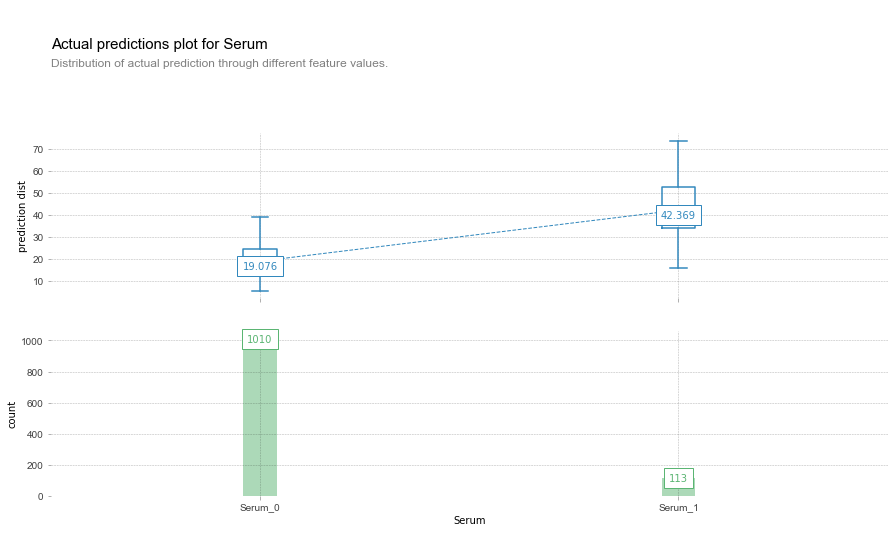

In [57]:
fig, axes, summary_df = info_plots.actual_plot(
    # notice these options -- accesing the appropriate parts of our pipeline to get the data setup
    model=model1, X=X_train1, 
    feature='Serum', feature_name='Serum', predict_kwds={}
)

In [ ]:
The model indicates that on average, serums are about £23 more expensive than non-serums. 

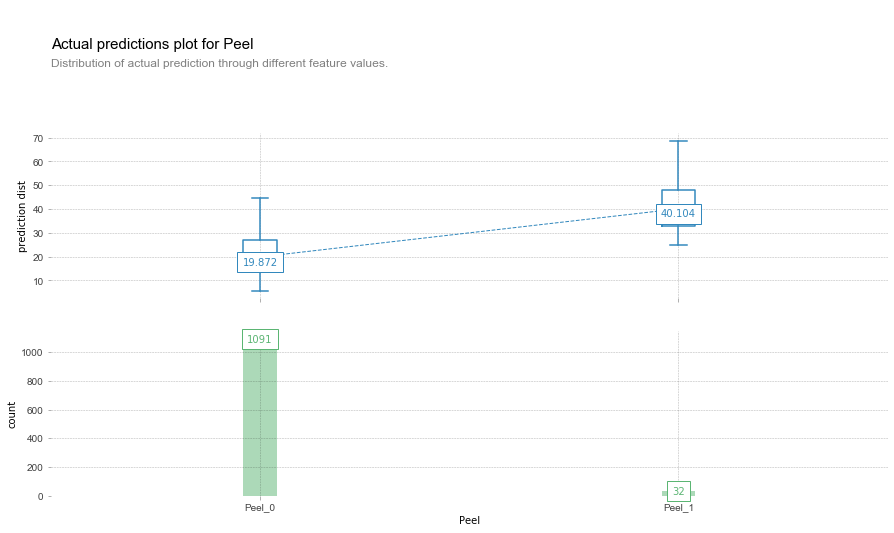

In [58]:
fig, axes, summary_df = info_plots.actual_plot(
    # notice these options -- accesing the appropriate parts of our pipeline to get the data setup
    model=model1, X=X_train1, 
    feature='Peel', feature_name='Peel', predict_kwds={}
)

In [ ]:
Overall, peels are about £20 more than non-peel products. 

In [59]:
# gbm.score(X_val1, y_val1), gbm.score(X_test1, y_test1)
gbm.score(X_test1, y_test1)

-0.0710825324709341

In [62]:
X_test1

,ingred_0,ingred_1,ingred_2,ingred_3,ingred_4,ingred_5,ingred_6,ingred_7,ingred_8,ingred_9,...,Cleanser,Exfoliator,Eye Care,Mask,Mist,Moisturiser,Oil,Peel,Serum,Toner
0,83,303.0,129.0,147.0,84.0,107.0,91.0,169.0,148.0,439.0,...,0,0,0,0,0,0,0,0,0,0
1,19,283.0,123.0,147.0,425.0,222.0,444.0,169.0,148.0,112.0,...,0,0,0,0,0,0,0,0,0,0
2,201,169.0,335.0,402.0,138.0,450.0,36.0,435.0,48.0,15.0,...,0,0,0,0,0,0,0,0,0,0
3,218,201.0,336.0,315.0,127.0,451.0,445.0,316.0,61.0,230.0,...,0,0,0,0,0,0,0,0,0,0
4,19,304.0,314.0,147.0,426.0,452.0,446.0,169.0,56.0,159.0,...,0,0,0,0,0,0,0,0,0,0
5,19,117.0,135.0,403.0,427.0,453.0,447.0,436.0,442.0,108.0,...,0,0,0,0,0,0,0,0,0,0
6,10,290.0,176.0,46.0,138.0,137.0,32.0,94.0,98.0,157.0,...,0,0,0,0,0,0,0,0,0,0
7,19,304.0,314.0,404.0,138.0,421.0,446.0,395.0,104.0,159.0,...,0,0,0,0,0,0,0,0,0,0
8,219,208.0,337.0,405.0,428.0,213.0,448.0,437.0,448.0,108.0,...,0,0,0,0,0,0,0,0,0,0
9,12,305.0,338.0,22.0,9.0,318.0,15.0,133.0,449.0,162.0,...,0,0,0,0,0,0,0,0,0,0


##Post-mortem anaylsis 
Overall, in this analysis, the model performed worse in the training dataset than in the validation data and the test data. This may be expected because of the small sample size of the dataset and the limited number of features informing the model and the limited variation within each feature. For instance, there are only 113 serums in the dataset relative to 1010 non-serum products. There is also likely missing data that would influence price, such as the larger parent brand of each brand of the unique products in the dataset. 